In [ ]:
THESE ARE SOME NECESSARY LIBRARIES

In [1]:
import numpy as np
import itertools
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

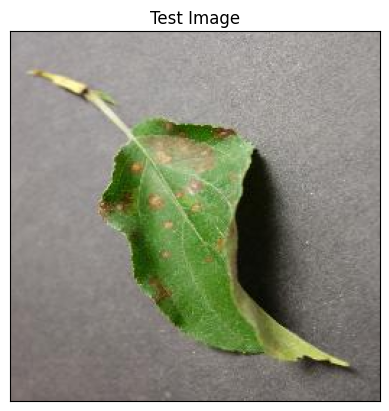

In [4]:
#Test Image Visualization
import cv2
image_path = 'E:\Minor Project\test\test\PotatoHealthy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


In [6]:
print(predictions)

[[1.46720840e-05 1.86517536e-06 9.94617045e-01 1.74568783e-07
  3.25590343e-04 6.16760872e-06 7.05550249e-08 2.70542091e-06
  5.96089489e-09 2.53072745e-08 2.21152249e-10 8.75871956e-06
  1.62140122e-06 3.16111084e-07 1.08684524e-07 9.32246621e-07
  1.23436749e-03 1.52536441e-05 7.75844965e-04 5.46295087e-05
  2.28252375e-07 1.24328187e-06 9.17977729e-08 2.80258882e-06
  9.87328974e-08 2.39122954e-07 5.39663379e-05 4.05746619e-08
  2.26362539e-03 3.33909120e-05 2.72249417e-05 1.25769249e-04
  2.57003441e-04 3.35646547e-07 1.59578005e-04 7.71813302e-06
  5.72430235e-06 6.92662070e-07]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


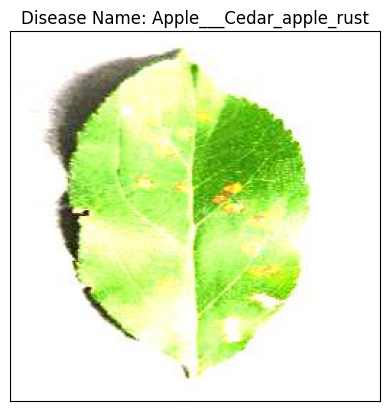

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [18]:
from sklearn.metrics import accuracy_score

true_labels = [0, 1, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6]
predicted_labels = [0, 1, 3, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 7]  

accuracy = accuracy_score(true_labels, predicted_labels) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 95.00%
